# Phase 1 Project

# Business Understanding

Esteemed Microsoft Board of Directors, it is an honor to be addressing you today with regards to the opportunity to delve into the film industry. As a data-driven individual, I have analyzed the potential profits and identified simple yet achievable goals for this endeavor. I am confident that my presentation will provide valuable insights and a clear recommendation on how to proceed.

Having thoroughly researched and analyzed the film industry, I am aware of the various trends and challenges that come with this field. I understand the importance of making well-informed and strategic decisions that align with the goals and values of our company. My recommendation will be based on a thorough evaluation of market trends, consumer preferences, and the competitive landscape, ensuring that we make a wise investment and maximize our potential for success. I am confident that with my understanding of the industry and my ability to make data-driven decisions, I can provide valuable insights and recommendations that will benefit Microsoft and help us achieve our goals.

## Business Problem

The film industry is constantly evolving, and it is crucial for us to have a thorough understanding of recent developments in order to make a well-informed decision. By analyzing the IMDb database, which contains over 70,000 films made in the past 12 years, we can gain valuable insights into consumer preferences and market trends. By looking at the films with the highest ratings and the most votes, we can identify the genres and production elements that have resonated with audiences and use this information to inform our strategy. This analysis will be a crucial step in ensuring that we make a wise investment and achieve the most profitability possible.

# Data Understanding

In order to fully understand the data, it is important to consider not only the apparent winners but also potential drawbacks and limitations. By examining the top-rated and most voted films in the IMDb database, we may identify a clear market trend. However, it is also important to acknowledge any limitations or potential drawbacks to this strategy. For example, relying solely on the most popular films may result in a narrow focus and limited creativity.

However, this information can still be used to inform a secondary production set that balances profitability with creative expression. By combining the insights gained from analyzing market trends with our own unique vision and mission, we can create a strategy that sets us apart from the competition and allows us to achieve both commercial success and artistic fulfillment.

# Exploratory Data Analysis

In order to look at the data, I am going to import some Python libraries. This is a technical step, as will be every time I present code here. This is what manages our data and generates our graphs. 

In [1]:
# Bringing in the libraries I will use for this project
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import random
import matplotlib.pyplot as plt
import seaborn as sns

Having imported the Python libraries I will use for the technical presentation, I will now access the IMDb database. I do this with SQLite. Please bare with me, we will be see the data in just a few moments.

In [2]:
# Connecting to the IMDb Database
conn = sqlite3.connect('Data\im.db')
cursor = conn.cursor()

In [3]:
# Let's see that the data is there
! dir Data

 Volume in drive C has no label.
 Volume Serial Number is 5CDE-0ED8

 Directory of C:\Users\us\Documents\DT Flatiron Flex Course\phase_1\Microsoft_Film_Proposal\Data

02/14/2023  11:28 AM    <DIR>          .
02/14/2023  11:28 AM    <DIR>          ..
01/09/2023  11:47 AM            53,544 bom.movie_gross.csv.gz
12/20/2021  04:31 PM       169,443,328 im.db
01/09/2023  11:47 AM        67,149,708 im.db.zip
02/13/2023  02:38 PM            83,441 Monkey_Wrench.jpg
02/13/2023  03:21 PM         1,184,685 rt.movie_info.tsv
01/09/2023  11:47 AM           498,202 rt.movie_info.tsv.gz
01/09/2023  11:47 AM         3,402,194 rt.reviews.tsv.gz
01/09/2023  11:47 AM           827,840 tmdb.movies.csv.gz
01/09/2023  11:47 AM           153,218 tn.movie_budgets.csv.gz
               9 File(s)    242,796,160 bytes
               2 Dir(s)  324,855,513,088 bytes free


In [4]:
sql_tables = """
select name
from sqlite_master
where type='table'
"""

I will now show you the tables this database offers.  From here we will be able to produce the relevant information and analyze it:

In [5]:
pd.read_sql(sql_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [6]:
df_1 = pd.read_sql(sql_tables, conn)
df_1.head()


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


Let's now see some of the movies by their ID, title, year of production, runtime length and genre.  

In [7]:
sql = "SELECT * FROM movie_basics"
df = pd.read_sql(sql, conn)
df.head(25)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [8]:
# How big is our data frame?
df.shape

(146144, 6)

Now that we have our movie listings, let's take a brief look at the ratings:

We can now see the average rating (averagerating), and the number of votes (numvotes).  Being this a very large listing, we are only looking at a sample of five.

Certainly, our analysis will look at a larger sample, selecting the best-scoring items in our data.  

First, let us put together the rating table with that of movie basics, which has the complementary information necessary for the purposes of our presentation. We will limit our presentation to the top 25 best scoring movies.

In [9]:
# Only the top 25
query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY averagerating DESC
LIMIT 25
"""
cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print(row)


('tt10176328', 'Exteriores: Mulheres Brasileiras na Diplomacia', 'Exteriores: Mulheres Brasileiras na Diplomacia', 2018, 52.0, 'Documentary', 'tt10176328', 10.0, 5)
('tt10378660', 'The Dark Knight: The Ballad of the N Word', 'The Dark Knight: The Ballad of the N Word', 2018, 129.0, 'Comedy,Drama', 'tt10378660', 10.0, 5)
('tt1770682', 'Freeing Bernie Baran', 'Freeing Bernie Baran', 2010, 100.0, 'Crime,Documentary', 'tt1770682', 10.0, 5)
('tt2632430', 'Hercule contre Hermès', 'Hercule contre Hermès', 2012, 72.0, 'Documentary', 'tt2632430', 10.0, 5)
('tt4109192', 'I Was Born Yesterday!', 'I Was Born Yesterday!', 2015, 31.0, 'Documentary', 'tt4109192', 10.0, 6)
('tt4944240', 'Dog Days in the Heartland', 'Dog Days in the Heartland', 2017, None, 'Drama', 'tt4944240', 10.0, 5)
('tt4960818', 'Revolution Food', 'Revolution Food', 2015, 70.0, 'Documentary', 'tt4960818', 10.0, 8)
('tt5089804', 'Fly High: Story of the Disc Dog', 'Fly High: Story of the Disc Dog', 2019, 65.0, 'Documentary', 'tt5089

The data above is not easy to read.  Bare with me. I will not present it in tabular form.  It will look more like a spreadsheet.

In [10]:
# Let's make this into a tabular presentation
import pandas as pd

query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY averagerating DESC
"""
cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result)
df = df.drop(df.columns[1], axis=1)
df.columns = ['movie_id', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes']
df.head(25)

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,tt10176328,10.0,5
1,tt10378660,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",tt10378660,10.0,5
2,tt1770682,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",tt1770682,10.0,5
3,tt2632430,Hercule contre Hermès,2012,72.0,Documentary,tt2632430,10.0,5
4,tt4109192,I Was Born Yesterday!,2015,31.0,Documentary,tt4109192,10.0,6
5,tt4944240,Dog Days in the Heartland,2017,NaN,Drama,tt4944240,10.0,5
6,tt4960818,Revolution Food,2015,70.0,Documentary,tt4960818,10.0,8
7,tt5089804,Fly High: Story of the Disc Dog,2019,65.0,Documentary,tt5089804,10.0,7
8,tt5344358,All Around Us,2019,NaN,Documentary,tt5344358,10.0,6
9,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,tt5390098,10.0,5


Alrigth! We now have a sample of the 25 best rated film productions, world-wide. 

In [11]:
df.shape

(73856, 8)

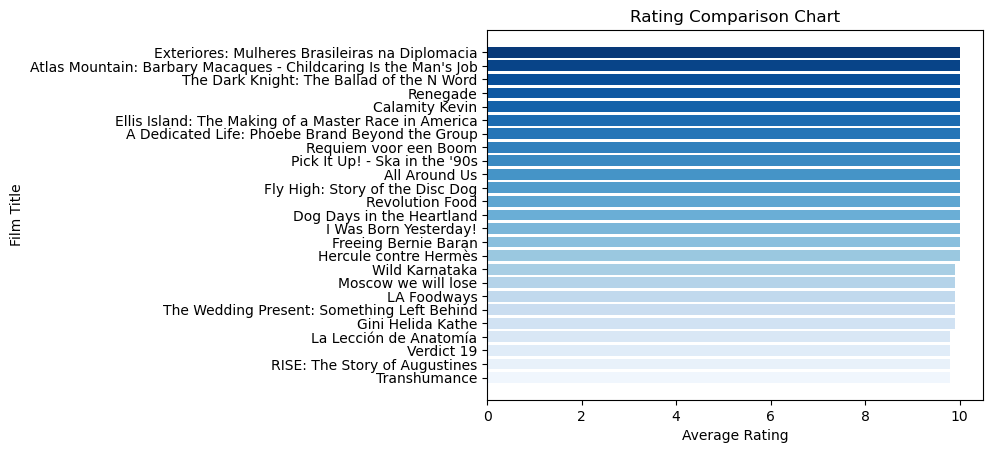

In [12]:
# Sort dataframe by Average Rating in descending order
df = df.sort_values(by='averagerating', ascending=False)

# Select the top 25 rows
df = df.iloc[:25,:]

# Reverse the order of the dataframe
df = df.iloc[::-1]

# Create horizontal bar graph
colors = sns.color_palette("Blues", 25)
plt.barh(df['original_title'], df['averagerating'], color=colors)
plt.ylabel('Film Title')
plt.xlabel('Average Rating')
plt.title("Rating Comparison Chart")
plt.show()


Let's see what these data tells us.

What genre are these movies?

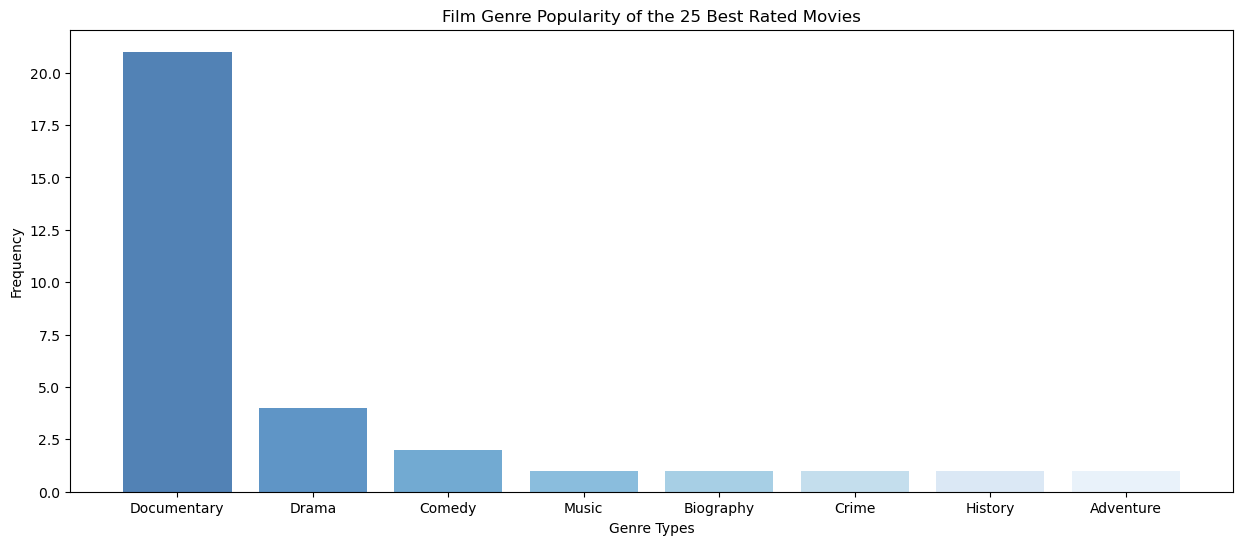

In [13]:
plt.figure(figsize=(15,6))

# Splitting the genres column into separate genres and counting the frequency of each genre
genres = df["genres"].str.split(",").explode()
genres_count = genres.value_counts()

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(genres_count)) 

# Plotting the bar graph
plt.bar(genres_count.index, genres_count.values, 
        color=palette, alpha=0.7)
plt.xlabel("Genre Types")
plt.ylabel("Frequency")
plt.title("Film Genre Popularity of the 25 Best Rated Movies")
plt.xticks()
plt.show()


The graph above shows us that documentaries are, beyond the shadow of a doubt, far better rated than other genre of film.  Another question I would like to ask the the length of each film.

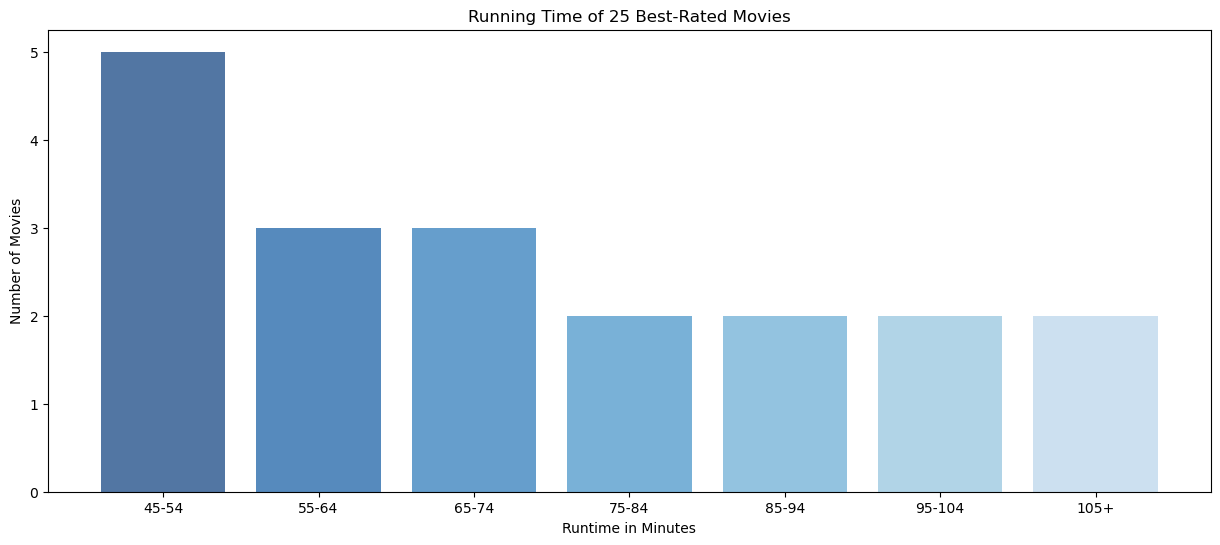

In [14]:
# Now let's look at the length of each film vs its rating:
plt.figure(figsize=(15,6))

# Dividing the runtime into two groups: between 45 and 105 minutes, and outside of that interval
bins = [45, 55, 65, 75, 85, 95, 105, df['runtime_minutes'].max()]
labels = ['45-54', '55-64', '65-74', '75-84', '85-94', '95-104', '105+']
df['runtime_group'] = pd.cut(df['runtime_minutes'], bins=bins, labels=labels)

# Counting the number of movies in each runtime group
group_counts = df['runtime_group'].value_counts()

# Setting the color map to shades of blue, from dark to light
cmap = plt.cm.Blues_r

# Creating the bar plot
plt.bar(group_counts.index, group_counts.values, 
        color=cmap(np.linspace(0.05, 0.7, len(group_counts))), alpha=0.7)
plt.xlabel("Runtime in Minutes")
plt.ylabel("Number of Movies")
plt.title("Running Time of 25 Best-Rated Movies")
plt.show()


What I have shown you so far suggests that making documentary films 45 to 80 minutes in length would be my recommentation.  Well, it is...

However, this is not the best option for a profitable investment. The reason for this is that, albeit being highly-rated, these productions count with very few votes.  Meaning, that only a few selected viewers are voting for these films.  Yes, this selected public likes the genre very much.  

This is what we call a "false positive". A single metric measure appears to answer our question, but it does not. 

For now, let's keep that information on the back burner.  

Let's now ask what film genre has most votes.  This will show the much larger public that watches, consumes, and votes for movies.

In [15]:
query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY numvotes DESC
"""
cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result)
df = df.drop(df.columns[1], axis=1)
df.columns = ['movie_id', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes']

df_secondary = df.copy()
df_secondary = df_secondary.sort_values(['numvotes', 'averagerating'], ascending=[False, False])
df_secondary.head(25)


,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
5,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
6,tt1130884,Shutter Island,2010,138.0,"Mystery,Thriller",tt1130884,8.1,1005960
7,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",tt2015381,8.1,948394
8,tt1431045,Deadpool,2016,108.0,"Action,Adventure,Comedy",tt1431045,8.0,820847
9,tt1392170,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",tt1392170,7.2,795227


Now we have a much different picture of these succesfull motion pictures - pun intended. As common sense would dictate, the masses aren't as culture-driven. They mostly watch something other than documentaries. Let's see what genre are they most prompt to consume:

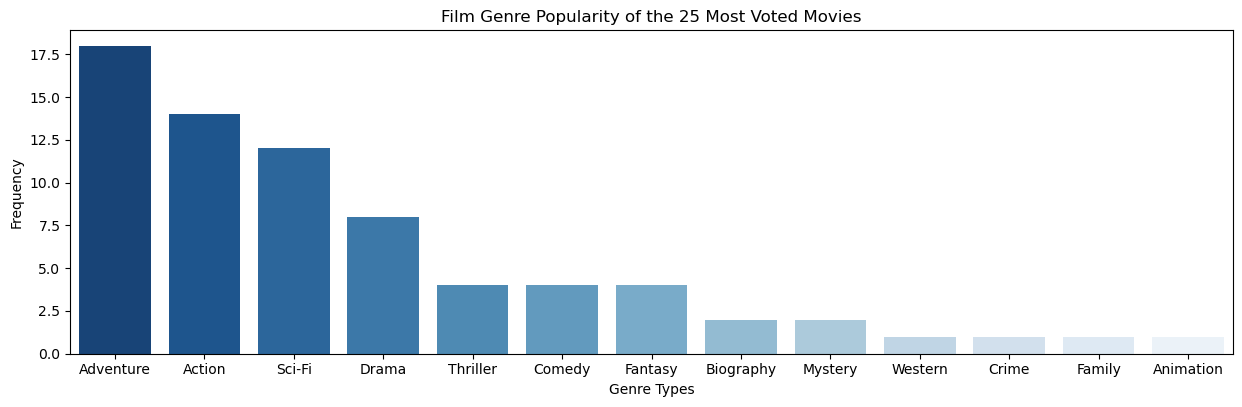

In [16]:
# Sorting df_secondary by numvotes and averagerating
df_secondary = df_secondary.sort_values(by=['numvotes', 'averagerating'], ascending=False)

# Selecting the top 25 rows
top_25 = df_secondary[:25]

# Setting the height and width of the graph
plt.figure(figsize=(15,4.2))

# Splitting the genres column into separate genres and counting the frequency of each genre
genres = top_25["genres"].str.split(",").explode()
genres_count = genres.value_counts()

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(genres_count))

# Plotting the bar graph
sns.barplot(x=genres_count.index, y=genres_count.values, palette=palette)
plt.xlabel("Genre Types")
plt.ylabel("Frequency")
plt.title("Film Genre Popularity of the 25 Most Voted Movies")
plt.xticks()
plt.show()


Even though many productions combine two or three types of genre, the winners are clearly Adventure, Action and Sci-Fi films. These are by far the most popular, and certainly the obviously best choice of a profitable investment in the film industry in our generation.  

How about the length?  Keep people entertained for a couple hours!

C:\Users\us\AppData\Local\Temp\ipykernel_2140\329015420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25['runtime_group'] = pd.cut(top_25['runtime_minutes'], bins=bins, labels=labels)


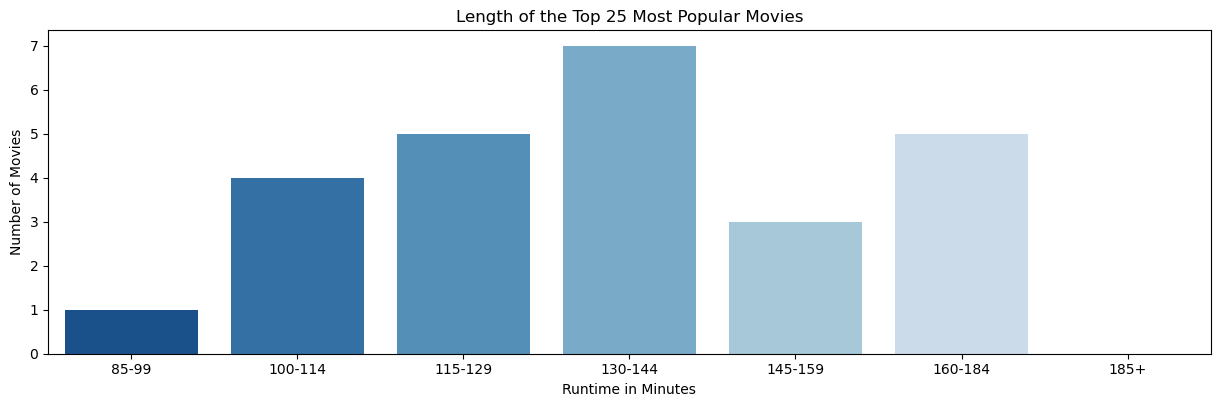

In [23]:
# Setting the height and width of the graph
plt.figure(figsize=(15,4.2))

# Dividing the runtime into 7 groups, between 85 and 185 minutes
bins = [85, 100, 115, 130, 145, 160, 185, top_25['runtime_minutes'].max()]
bins = sorted(list(set(bins)))
labels = ['85-99', '100-114', '115-129', '130-144', '145-159', '160-184', '185+']
top_25['runtime_group'] = pd.cut(top_25['runtime_minutes'], bins=bins, labels=labels)

# Counting the number of movies in each runtime group
group_counts = top_25['runtime_group'].value_counts()

# Sorting the group counts by the order of the labels
group_counts = group_counts.loc[labels]

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(group_counts))

# Creating the bar plot
sns.barplot(x=group_counts.index, y=group_counts.values, palette=palette)
plt.xlabel("Runtime in Minutes")
plt.ylabel("Number of Movies")
plt.title("Length of the Top 25 Most Popular Movies")
plt.show()



Let's ask now the most important question your investors will want to know. The bottom line. What type of movies make the most profit? This will be a very important measure to compare and test my assumption.

So lets go for the measures in the right tables:

In [25]:
import pandas as pd
df_3 = pd.read_csv('Data/bom.movie_gross.csv.gz')

df_3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [26]:
df_3.shape

(3387, 5)

For the sake of clarity, let's see a total gross profit by adding international and domestic gross profit.

In [27]:

# Convert domestic_gross and foreign_gross columns to numeric format
df_3['domestic_gross'] = pd.to_numeric(df_3['domestic_gross'], errors='coerce')
df_3['foreign_gross'] = pd.to_numeric(df_3['foreign_gross'], errors='coerce')

# Add total_gross column
df_3['total_gross'] = df_3['domestic_gross'] + df_3['foreign_gross']

# Format total_gross column as currency
df_3['total_gross'] = df_3['total_gross'].apply(lambda x: "${:,.2f}".format(x))

# Make sure the film with the greatest total gross revenue appears on top
df_3 = df_3.sort_values(by='total_gross', ascending=True)


df_3.head()


,title,studio,domestic_gross,foreign_gross,year,total_gross
1742,Borgman,Drft.,57500.0,952000.0,2014,"$1,009,500.00"
242,Leaves of Grass,First,70100.0,949000.0,2010,"$1,019,100.00"
730,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000.0,2012,"$1,021,100,000.00"
594,Vanishing on 7th Street,Magn.,22700.0,1000000.0,2011,"$1,022,700.00"
2325,Zootopia,BV,341300000.0,682500000.0,2016,"$1,023,800,000.00"


Now we are talking! Let us now take a look in a graph: what films make the biggest buck 💵💶.

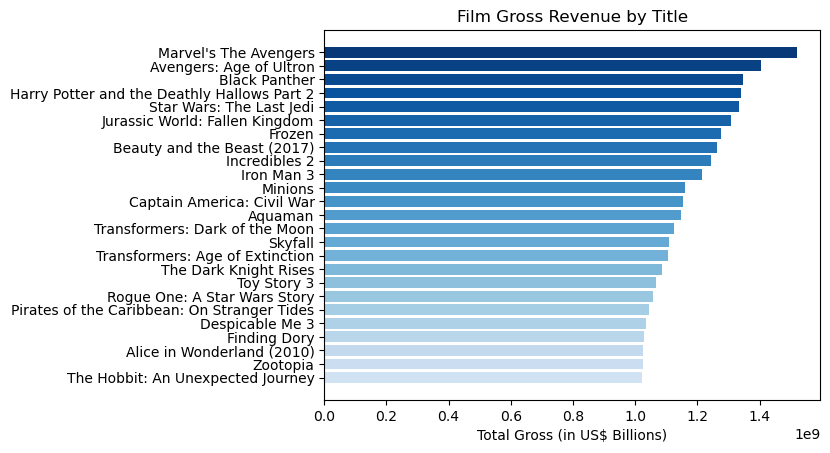

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reading from here
df_4 = pd.read_csv('Data/bom.movie_gross.csv.gz')

# Convert domestic_gross and foreign_gross columns to numeric format
df_4['domestic_gross'] = pd.to_numeric(df_4['domestic_gross'], errors='coerce')
df_4['foreign_gross'] = pd.to_numeric(df_4['foreign_gross'], errors='coerce')

# Add total_gross column
df_4['total_gross'] = df_4['domestic_gross'] + df_4['foreign_gross']

# Plot the data
colors = sns.color_palette("Blues", 30)[::-1]
df_4 = df_4.sort_values(by='total_gross', ascending=False).head(25)
plt.barh(df_4['title'], df_4['total_gross'], color=colors)
plt.xlabel('Total Gross (in US$ Billions)')
plt.title('Film Gross Revenue by Title')
plt.gca().invert_yaxis()
plt.show()


Of course, our ABCs in basic business force us to ask for the cost. We can't measure the real business success if costs outweight revenue. Se we will now look at movie budget. 

In [29]:
import pandas as pd
df_5 = pd.read_csv('Data/tn.movie_budgets.csv.gz')

df_5.shape

(5782, 6)

In [30]:
df_5.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


Bear with me, please. Now we're talking business. This table alone may provide us with a concrete answer. 
Seems to me that the "Worldwide Gross" includes the Domestic Gross" revenue. If we substract that to Production Budget, we will have an actual revenue figure. Let's do that!

First, some technical preparations that will allow us to get to the bottom of this. I will play with the type of data our financial information columns in the classification of Python programming. We will check the type of data, convert them into the type we can edit, remove the dollar signs and commas

In [31]:
# Checking the column types before doing any math here:
df_5.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [32]:
# Transforming the type to string in order to eliminate dollar signs and commas - a step towards making the math
df_5['domestic_gross'] = df_5['domestic_gross'].astype(str)
df_5['production_budget'] = df_5['production_budget'].astype(str)
df_5['worldwide_gross'] = df_5['worldwide_gross'].astype(str)

In [33]:
# Changing types to do math, but first eliminate the fancy dollar signs and commas. 
df_5['domestic_gross'] = df_5['domestic_gross'].str.replace("$", "")
df_5['domestic_gross'] = df_5['domestic_gross'].str.replace(",", "")
df_5['domestic_gross'] = df_5['domestic_gross'].astype(float)

df_5['production_budget'] = df_5['production_budget'].str.replace("$", "")
df_5['production_budget'] = df_5['production_budget'].str.replace(",", "")
df_5['production_budget'] = df_5['production_budget'].astype(float)


df_5['worldwide_gross'] = df_5['worldwide_gross'].str.replace("$", "")
df_5['worldwide_gross'] = df_5['worldwide_gross'].str.replace(",", "")
df_5['worldwide_gross'] = df_5['worldwide_gross'].astype(float)

# This gives us a warning, but still works

C:\Users\us\AppData\Local\Temp\ipykernel_2140\404604489.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_5['domestic_gross'] = df_5['domestic_gross'].str.replace("$", "")
C:\Users\us\AppData\Local\Temp\ipykernel_2140\404604489.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_5['production_budget'] = df_5['production_budget'].str.replace("$", "")
C:\Users\us\AppData\Local\Temp\ipykernel_2140\404604489.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_5['worldwide_gross'] = df_5['worldwide_gross'].str.rep

In [34]:
# Checking the column types again to see if we succesfully changed them:
df_5.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [35]:
# Now let's look at our modifed table
df_5.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08


Now let's subtract Production Budget from Worldwide Gross - assuming that the latter already includes the Domestic Gross amount we will call that "Actual Revenue" - meaning, Net Profit.

In [36]:
# Now let's subtract Production Budget from Worldwide Gross - 
# assuming that the latter already includes the Domestic Gross amount
# we will call that "Actual Revenue"

df_5['actual_revenue'] = df_5['worldwide_gross'] - df_5['production_budget']

#and organize our dataframe according to this new column
df_5.sort_values(by='actual_revenue', ascending=False, inplace=True)

df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,actual_revenue
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09


Worth the effort! We have concrete figures now on the actual winning money-making films in the industry.  Let's graph our results!

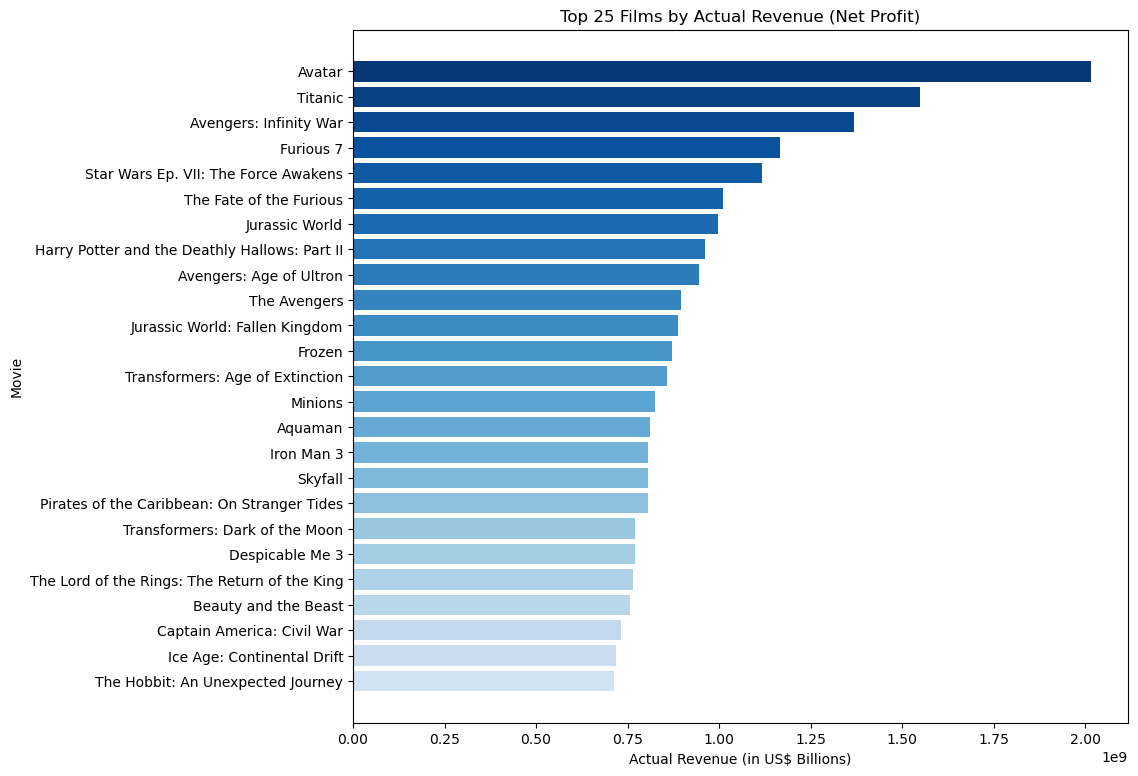

In [37]:
# Our Actual Revenue calculation
df_5['actual_revenue'] = df_5['worldwide_gross'] - df_5['domestic_gross']
df_5 = df_5.nlargest(25, 'actual_revenue')

# Plotting the data

# Color palette in shades of blue, darker first
colors = sns.color_palette("Blues", 30)[::-1]

# Graph Size
plt.figure(figsize=(10, 9))

# Graph Axis, enter colors in place, lable axis
plt.barh(df_5['movie'], df_5['actual_revenue'], color=colors)
plt.xlabel('Actual Revenue (in US$ Billions)')
plt.ylabel('Movie')

# Place title, place biggest actual revenue film first
plt.title('Top 25 Films by Actual Revenue (Net Profit)')
plt.gca().invert_yaxis()

# Render graph
plt.show()

Now we may beging asking the key questions.  We have the information in the sources above.  What genre are these high net-profit movies?

In [38]:
df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,actual_revenue
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.165716e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09


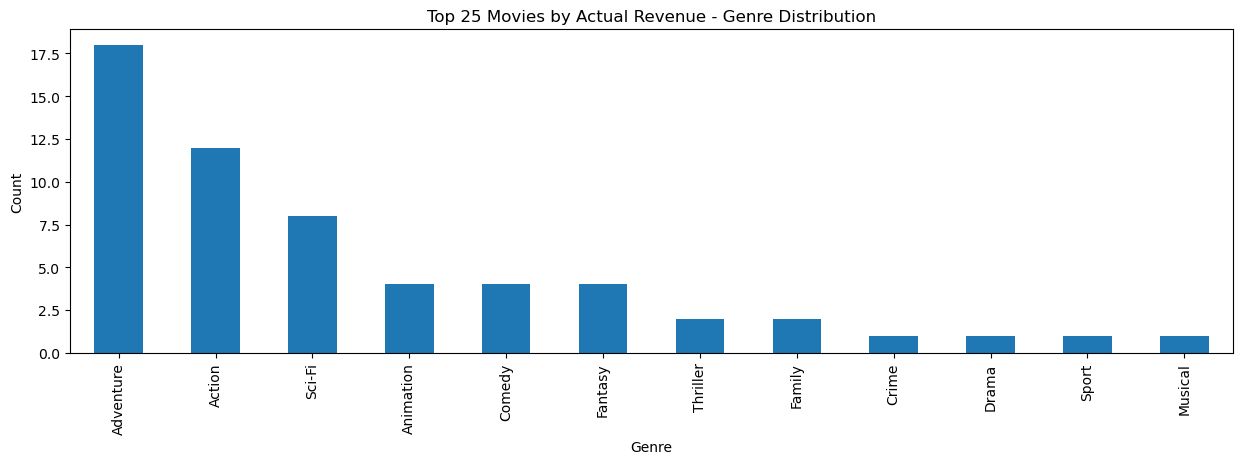

In [39]:
# Setting the height and width of the graph
plt.figure(figsize=(15,4.2))

# merge the two dataframes on the movie column in df_5 and original_title column in df
df_merged = pd.merge(df_5.sort_values("actual_revenue", ascending=False).head(25), df, left_on="movie", right_on="original_title")

# count the number of occurrences of each genre in the merged dataframe
genre_counts = df_merged["genres"].str.split(",").explode().value_counts()

# plot the genre count in a bar graph
genre_counts.plot(kind="bar", xlabel="Genre", ylabel="Count", title="Top 25 Movies by Actual Revenue - Genre Distribution")
plt.xticks();


Now we see as clear as daylight that Adventure and Action movies are the winning bet. Sci-Fi comes in an honorable third place. Perhaps a combo of the three would be the best for good returns. 

I would even venture to say that a movie like 'Titanic', classified as a Romance and a Drama, actually made the big bucks because of the Adventure element in it. But that is my opinion.  The Data shows that, clearly, Adventure and Action films present the best ROI.

This independent research data only corroborates what we already saw above.

What else? Of course, let's look at the running time.

In [40]:
average_runtime = df_merged['runtime_minutes'].mean()
print("Average runtime: ", average_runtime)


Average runtime:  130.0


We have learned that the average runtime in minutes for our merged dataframe gathering the best net revenue popular films, worldwide, is 130 minutes.  Let's now create a dataframe to gather the runtime in minutes for these latest list of movies.  Then, let's explore the list:

In [61]:
# Merge df_5 and df_merged on movie_id column
df_7 = pd.merge(df_5, df_merged[['id', 'runtime_minutes']], on='id')

# Sort df_7 by actual_revenue column in descending order
df_7 = df_7.sort_values(by='actual_revenue', ascending=False)
df_7

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,actual_revenue,runtime_minutes
0,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,NaN
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,149.0
2,23,"Apr 14, 2017",The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,1.009082e+09,136.0
3,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,9.965842e+08,124.0
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,141.0
5,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,8.946564e+08,143.0
6,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,8.880530e+08,128.0
7,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,8.717319e+08,102.0
8,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,8.717319e+08,93.0
9,37,"Jun 27, 2014",Transformers: Age of Extinction,210000000.0,245439076.0,1.104039e+09,8.586000e+08,165.0


Titanic our most popular, net revenue producing film, is missing the runtime information. I happen to know that number should be 195, and have verified so with wikipedia (outside of our provided databases). I will take the freedom to correct that information manually, to then proceed with our graph.

In [72]:
df_7.loc[df_7['id'] == 43, 'runtime_minutes'] = 195.0

I also noticed that our champion film, Avatar, is missing from some reason.  Let's bring it back!

In [73]:
# Select the row with id "1" from df_5
row_to_add = df_5.loc[df_5['id'] == 1]

# Check if a row with the same id already exists in df_7
if not any(df_7['id'] == 1):
    # Append the selected row to df_7
    df_7 = df_7.append(row_to_add)

C:\Users\us\AppData\Local\Temp\ipykernel_2140\810279462.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_7 = df_7.append(row_to_add)


In [77]:
# Select the row with id "1" from df_5
row_to_add = df_5.loc[df_5['id'] == 43]

# Check if a row with the same id already exists in df_7
if not any(df_7['id'] == 43):
    # Append the selected row to df_7
    df_7 = df_7.append(row_to_add)

C:\Users\us\AppData\Local\Temp\ipykernel_2140\1233186771.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_7 = df_7.append(row_to_add)


I am amending a defect in our database, adding the necessaary information on the runtime length of the top two films, Avatar and Titanic.

In [79]:
df_7.loc[df_7['id'] == 43, 'runtime_minutes'] = 195.0

In [81]:
df_7.loc[df_7['id'] == 1, 'runtime_minutes'] = 162.0

In [82]:
# Checking that the missing data has been corrected:
df_7

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,actual_revenue,runtime_minutes
1,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,149.0
2,23,"Apr 14, 2017",The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,1.009082e+09,136.0
3,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,9.965842e+08,124.0
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,141.0
5,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,8.946564e+08,143.0
6,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,8.880530e+08,128.0
7,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,8.717319e+08,102.0
8,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,8.717319e+08,93.0
9,37,"Jun 27, 2014",Transformers: Age of Extinction,210000000.0,245439076.0,1.104039e+09,8.586000e+08,165.0
10,73,"Jul 10, 2015",Minions,74000000.0,336045770.0,1.160336e+09,8.242904e+08,91.0


Finally we have our data in place. Let's graph it:

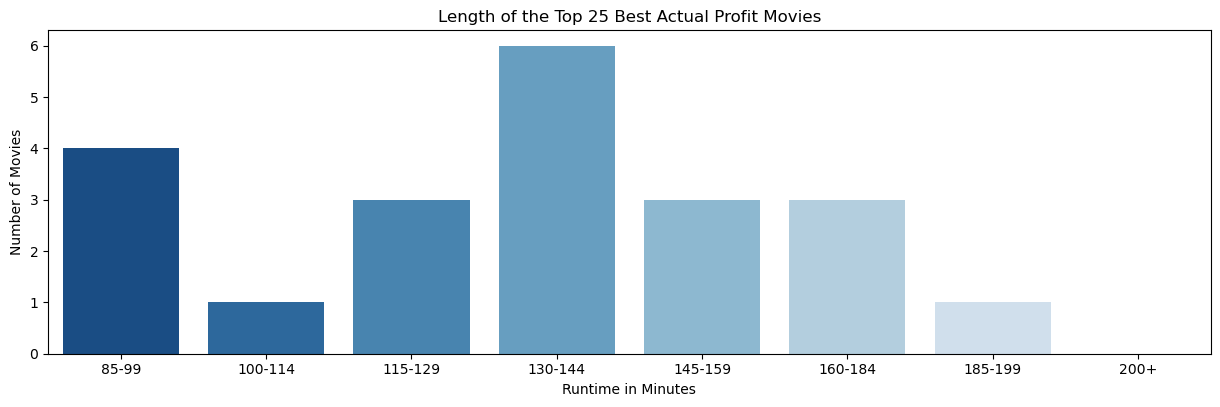

In [92]:
# Setting the height and width of the graph
plt.figure(figsize=(15,4.2))

# Dividing the runtime into 8 groups, between 85 and 200 minutes
bins = [85, 100, 115, 130, 145, 160, 185, 200, df_7['runtime_minutes'].max()]
bins = sorted(list(set(bins)))
labels = ['85-99', '100-114', '115-129', '130-144', '145-159', '160-184', '185-199', '200+']
df_7['runtime_group'] = pd.cut(df_7['runtime_minutes'], bins=bins, labels=labels)

# Counting the number of movies in each runtime group
group_counts = df_7['runtime_group'].value_counts()

# Sorting the group counts by the order of the labels
group_counts = group_counts.loc[labels]

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(group_counts))

# Creating the bar plot
sns.barplot(x=group_counts.index, y=group_counts.values, palette=palette)
plt.xlabel("Runtime in Minutes")
plt.ylabel("Number of Movies")
plt.title("Length of the Top 25 Best Actual Profit Movies")
plt.show()

As consistent with the previous analysis, 130 to 144 minutes length is the appropriate runtime for a successful film. True, there is a preference for shorter film (see the dark blue bar on the left). Keep that in mind for the secondary recommendation. But also notice that the single film on the 185 to 199 minute bar, Titanic, is also the most succesful in terms of profit, and one of the best in terms of popularity.   

The data suggests, thus, that 130 minutes is the most likely to produce profitable results, as well as being a successfully popular film.

# Conclusion

I understand the importance of presenting a well-rounded perspective to the Microsoft Board of Directors and ultimately, to Mr. Gates. As a visionary leader and philanthropist, he not only cares about the financial success of our company, but also his legacy and how he can benefit humanity through our endeavors.

With that in mind, I strongly recommend that we focus on producing Adventure, Action, and Sci-Fi movies. These genres have proven to be highly profitable in the film industry and offer a high potential for commercial success. By competing with the major players in Hollywood, we can establish Microsoft as a significant player in the film industry and achieve the financial goals we have set.

However, my early recommendation is that we not only focus on profitability, but also consider how we can use this opportunity to make a positive impact on society and align with Mr. Gates' mission of benefiting humanity. By exploring themes and storylines that raise awareness and drive positive change, we can create films that are both financially successful and leave a lasting impact on the world.

# Recomentations

Let Microsoft produce movies averaging two hours and ten minutes in length on the genres of Adventure, Action, and Sci-Fi.  May be a combination of two or all three genres. One hundred and thirty minutes in length. 

I recommend that, once this show profitability, let Microsoft also produce shorter documentary films.  

As for the length of a documentary, 45 to 54 minutes in length looks like a winner. Shorter film also was shown to be of weight in our last graphic (gravitating towards 85 minutes).  Hence, if our documentary has continuosly caught the public's attention, it may extend beyond an hour for up to 25 minutes.  

This latter  recommendation is for the good name of Microsoft, once financial success has been achieved in this new venture in the film industry.

# Next Steps

It is time to start gathering the team to sketch the story line and the script for Microsoft Film's first Adventure and Action film production. 